In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../dataset/Admission_Predict.csv')

In [7]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.3 KB


In [6]:
df.duplicated().sum()

0

In [9]:
df.drop(columns=["Serial No."],inplace=True)

In [11]:
X=df.iloc[:,0:-1]
y=df.iloc[:,-1]

In [12]:
from sklearn.model_selection import train_test_split
x_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)

In [13]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
x_train_scaler=scaler.fit_transform(x_train)
x_test_scaler=scaler.transform(X_test)

In [14]:
from tensorflow.python import keras
from keras import Sequential
from keras.layers import Dense

In [30]:
model=Sequential()
model.add(Dense(7,activation="relu",input_dim=7))
model.add(Dense(7,activation="relu"))
model.add(Dense(1,activation="linear"))

In [31]:
model.compile(loss="mean_squared_error",optimizer="Adam")

In [32]:
history = model.fit(x_train_scaler,y_train,epochs=25,validation_split=0.2)

Epoch 1/25


8/8 [==============================] - 2s 41ms/step - loss: 0.4015 - val_loss: 0.3529
Epoch 2/25
8/8 [==============================] - 0s 14ms/step - loss: 0.2880 - val_loss: 0.2443
Epoch 3/25
8/8 [==============================] - 0s 10ms/step - loss: 0.1983 - val_loss: 0.1584
Epoch 4/25
8/8 [==============================] - 0s 14ms/step - loss: 0.1301 - val_loss: 0.0943
Epoch 5/25
8/8 [==============================] - 0s 13ms/step - loss: 0.0806 - val_loss: 0.0532
Epoch 6/25
8/8 [==============================] - 0s 11ms/step - loss: 0.0493 - val_loss: 0.0346
Epoch 7/25
8/8 [==============================] - 0s 10ms/step - loss: 0.0343 - val_loss: 0.0296
Epoch 8/25
8/8 [==============================] - 0s 12ms/step - loss: 0.0286 - val_loss: 0.0287
Epoch 9/25
8/8 [==============================] - 0s 15ms/step - loss: 0.0261 - val_loss: 0.0276
Epoch 10/25
8/8 [==============================] - 0s 14ms/step - loss: 0.0240 - val_loss: 0.0255
Epoch 11/25
8/8 [=======================

In [33]:
y_pred=model.predict(x_test_scaler)

3/3 [==============================] - 0s 3ms/step


In [34]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.5380773192835376

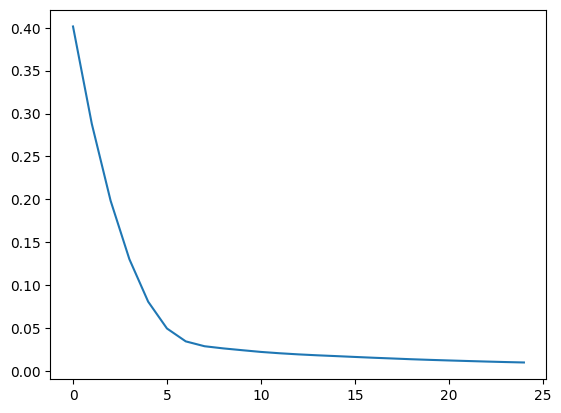

In [35]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])